# 直線あてはめにおいて正則化は傾きを寝かせ，切片を下げようとする．これにより汎化誤差が下がる理屈がよく分からない．

- DAY2 の多項式モデルでは重みを下げることで，「大人しい」関数になり，汎化性能が高まりそうとイメージできる．
- しかし，説明変数を多項式化しない通常の単なる線形回帰ではそのイメージが沸かない．
- 本当に直線の当てはめでも正則化は汎化誤差を改善する手立てになるのか？
- DAY1 の notebook の 1_linear_regression_psedo_data の問題に対し，正則化をした場合としなかった場合を比較する．

In [115]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数


In [116]:
# 入力データ x = [0, 1, 2, ..., 99]
x = np.arange(100)

# 教師データy：平均0, 標準偏差10の正規分布からサンプリングした乱数（ノイズ）をxに加えたものをyとする
np.random.seed(seed=1234)
y = np.random.normal(loc=x, scale=10)

# 本当の判断ルール：ノイズなしのデータ，つまりxそのもの
y_true = x.copy() 


# scikit learnのXは2次元の配列で入力することが基本であるため，ここで変換しておく
X = x.reshape(-1,1)
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）


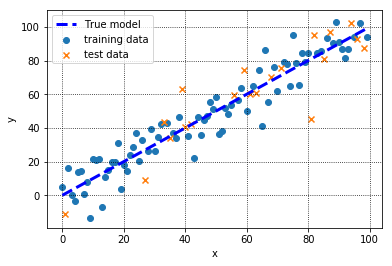

In [117]:
plt.scatter(X_train.ravel(), y_train, marker='o', label="training data")
plt.scatter(X_test.ravel(), y_test, marker='x', label="test data")
plt.plot(x, y_true, linestyle='--', linewidth=3, color='blue', label='True model')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

In [118]:

regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

y_est_train = regr.predict(X_train)
y_est_test  = regr.predict(X_test)


In [119]:
L2_regr = Ridge(alpha=100000,fit_intercept=True)
L2_regr.fit(X_train,y_train)
y_est_L2_train = L2_regr.predict(X_train)
y_est_L2_test = L2_regr.predict(X_test)

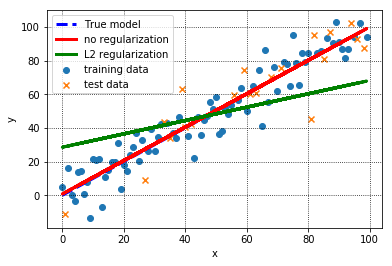

In [120]:
# オレンジ：真に得たいモデル
# 赤：重みをデタラメに決めたときのモデルの出力
# 紫：重みを最小二乗法に決めたときのモデルの出力
# 緑：scikit-learnで求めたモデルの出力
plt.scatter(X_train.ravel(), y_train, marker='o', label="training data")
plt.scatter(X_test.ravel(), y_test, marker='x', label="test data")
plt.plot(x, y_true, linestyle='--', linewidth=3, color='blue', label='True model')
plt.plot(X_train.ravel(), y_est_train, linestyle='-', linewidth=3, color='red', label='no regularization')
plt.plot(X_train.ravel(), y_est_L2_train, linestyle='-', linewidth=3, color='green', label='L2 regularization')
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()


In [121]:
# MSEを計算
mse_no_r = mean_squared_error(y_test, y_est_test) 
mse_L2_r = mean_squared_error(y_test, y_est_L2_test) 

# MAEを計算
mae_no_r = mean_absolute_error(y_test, y_est_test)
mae_L2_r = mean_absolute_error(y_test, y_est_L2_test)

# RMSEを計算
rmse_no_r = np.sqrt(mse_no_r)
rmse_L2_r = np.sqrt(mse_L2_r)

print("(no reguralization)\tMSE = {:.3f},\tMAE = {:.3f},\tRMSE = {:.3f}".format( mse_no_r, mae_no_r, rmse_no_r ))  
print("(L2 reguralization)\tMSE = {:.3f},\tMAE = {:.3f},\tRMSE = {:.3f}".format( mse_L2_r, mae_L2_r, rmse_L2_r ))  


(no reguralization)	MSE = 159.510,	MAE = 9.011,	RMSE = 12.630
(L2 reguralization)	MSE = 475.677,	MAE = 18.493,	RMSE = 21.810


# L2正則化をした方が汎化誤差が大きかった．
- グラフの見やすさのため，alpha=100000という極端な値とした．
- alphaは，0.0001, 0.001, 0.01, 0.1, 1.0 では汎化誤差は変わらなかった．
- alphaが10を超えると徐々に汎化誤差が広がった．
- データによっては逆に正則化がうまく効く場合もあるのだろう．しかし，直線の傾きを寝かしたり，切片を下げたりすることが一般に汎化性能を上げるというのは違和感がある．